Submission 2 Membuat Model Machine Learning dengan Data Time Series \ Nama: Sari Nurbaiti \ email: sarinurbaiti850@gmail.com\ No Hp/WA : 085783778776

In [1]:
!wget --no-check-certificate \
  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip \
  -O /content/Bike-Sharing-Dataset.zip

--2021-07-23 01:33:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘/content/Bike-Sharing-Dataset.zip’

/content/Bike-Shari 100%[===================>] 273.43K   526KB/s    in 0.5s    

2021-07-23 01:33:40 (526 KB/s) - ‘/content/Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [2]:
#Import library yang akan digunakan
import pandas as pd
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from zipfile import ZipFile
import os
# Membaca & mengekstak file dataset
local_zip = '/content/Bike-Sharing-Dataset.zip'
zip_ref = ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Menampilkan listnya
os.listdir('/content')

['.config', 'Bike-Sharing-Dataset.zip', 'sample_data']

In [5]:
dt_hour = pd.read_csv('/tmp/hour.csv', index_col='dteday')
dt_hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [6]:
#Menampilkan 10 data teratas
dt_hour.head(10)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
2011-01-01,6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
2011-01-01,7,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
2011-01-01,8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
2011-01-01,9,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


In [7]:
#Melihat 10 data terbawah
dt_hour.tail(10)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2012-12-31,17370,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
2012-12-31,17371,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
2012-12-31,17372,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
2012-12-31,17373,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
2012-12-31,17374,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
2012-12-31,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
#Melihat total data
dt_hour.shape

(17379, 16)

In [9]:
#Mendapatkan jumlah total nilai NaN di DataFrame
dt_hour.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#Melihat informasi dari data
dt_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.3+ MB


In [11]:
dt_hour.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [59]:

mnth = dt_hour['mnth'].values #mnth = month ( 1 to 12)
cnt = dt_hour['cnt'].values #cnt= count of total rental bikes including both casual and registered

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mnth,cnt,test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

13903 3476


In [79]:
# model
from keras.layers import Dense, LSTM

data_x_train = windowed_dataset(x_train, window_size=60, batch_size=80, shuffle_buffer=1000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=80, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [72]:
x = (90.0 - 1.0) * (10 / 100)
print(x)

8.9


In [80]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [81]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train ,epochs=50, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/50
174/174 [==============================] - 48s 252ms/step - loss: 41.8957 - mae: 42.3935 - val_loss: 6.1183 - val_mae: 6.6115
Epoch 2/50
174/174 [==============================] - 43s 245ms/step - loss: 9.5791 - mae: 10.0648 - val_loss: 8.8372 - val_mae: 9.3353
Epoch 3/50
174/174 [==============================] - 43s 246ms/step - loss: 5.9571 - mae: 6.4364 - val_loss: 7.3734 - val_mae: 7.8708

MAE of the model < 10% of data scale


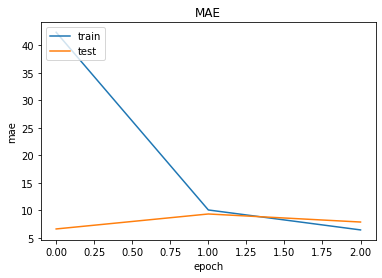

In [82]:
import matplotlib.pyplot as plt

# plot of mae
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

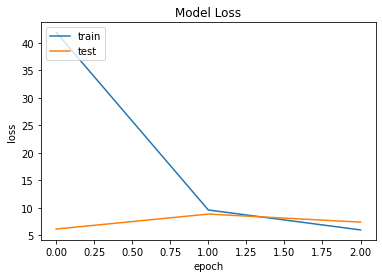

In [83]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()